In [9]:
from matplotlib import pyplot as plt
import matplotlib
import geopandas as gpd
import pandas as pd
import numpy as np
import shapely.geometry as shp
from shapely.geometry import Point
from shapely.validation import explain_validity
from mpl_toolkits.axes_grid1.axes_divider import make_axes_locatable
import os



# import contextily as ctx


CRS_LAT_LON = "epsg:4326"
# CRS_WGS84 = "EPSG:32719"
CRS_WGS84 = "EPSG:3857"
CRS_CHILE19S = "EPSG:20049"

In [10]:
comunas = gpd.read_file("../Distancias/comunas_fixed/comunas_fixed.shp")

In [11]:
comunas_proyected = comunas.to_crs(CRS_CHILE19S)

In [63]:
colegios = pd.read_parquet('data_final.parquet', columns=['RBD', 'X', 'Y', 'Aristas', 'Logistica','Manipuladora', 'Beneficio', 'Alimentos', 'Raciones', 'Profit', 'UT', 'geometry'])


In [64]:
geometry = [Point(xy) for xy in zip(colegios.X/10**5, colegios.Y/10**5)]
colegios_gpd = gpd.GeoDataFrame(colegios, crs=CRS_CHILE19S, geometry=geometry)

In [10]:
def identidad(x, value=35):
    return int(x==value)

In [14]:
def show_schools_and_comunas(comunas, colegios, name_value, name_graph):


    fig,ax=plt.subplots(1,1,figsize=(15,15))

    # colegios['value_log'] = colegios[name_value].apply(lambda x: identidad(x)) 
    colegios.plot(ax=ax, column=name_value, cmap='tab20c', legend=True, markersize=1)


    # colegios['value','geometry'].plot(ax=ax, cmap='viridis', legend=True)
    comunas.boundary.plot(ax=ax,color='k',lw=0.2)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    ax.legend([])
    # ax.plot(grid_x, grid_y, marker='.', markersize=1,color='k', linestyle='none')

In [ ]:
show_schools_and_comunas(comunas, colegios_gpd)

In [12]:
comunas_proyected.crs == colegios_gpd.crs

True

In [13]:
columna = "UT"


In [14]:
colegios_gpd[colegios_gpd['UT']==35]

,RBD,X,Y,Aristas,Logistica,Manipuladora,Beneficio,Alimentos,Raciones,Profit,UT,geometry
285,[9590],34911036002,628825242233,"[3296, 3162, 3365, 3152, 3328]",736630,358000,60223150,51670750,395,7457770,35,POINT (349110.360 6288252.422)
768,[11789],35187529217,628778915302,"[7962, 7953, 7944, 8235, 8227]",739791,358000,153812815,131969575,1011,20745449,35,POINT (351875.292 6287789.153)
771,[26292],35279408694,629041333656,"[8176, 8242, 7964, 8202, 7960, 8137, 7941, 8266]",737301,358000,123292260,105783300,810,16413659,35,POINT (352794.087 6290413.337)
775,[882640],35555559733,629015258023,"[8219, 778, 7949, 8225]",745082,0,2737800,2349000,18,-356282,35,POINT (355555.597 6290152.580)
776,[883757],35414493357,629062500220,"[7959, 8202, 5481, 7940, 7957, 7948]",737173,0,836550,717750,5,-618373,35,POINT (354144.934 6290625.002)
...,...,...,...,...,...,...,...,...,...,...,...,...
8553,[10572],34362132780,628682350844,"[8292, 8290, 8293, 8287, 7075, 8294, 8281]",739687,0,15822625,13575625,104,1507313,35,POINT (343621.328 6286823.508)
8554,[25938],34883784956,628546308138,"[3336, 8302, 8296, 8301, 8300, 7053]",735523,0,35004970,30033850,230,4235597,35,POINT (348837.850 6285463.081)
8593,[25016],34852651936,628670252351,"[3153, 3155, 3161, 7058, 7055, 3366]",735772,358000,100298120,86054600,659,13149748,35,POINT (348526.519 6286702.524)
8755,[884642],34988839645,628828457594,"[3296, 3162, 8397, 3149]",738035,0,253500,217500,1,-702035,35,POINT (349888.396 6288284.576)


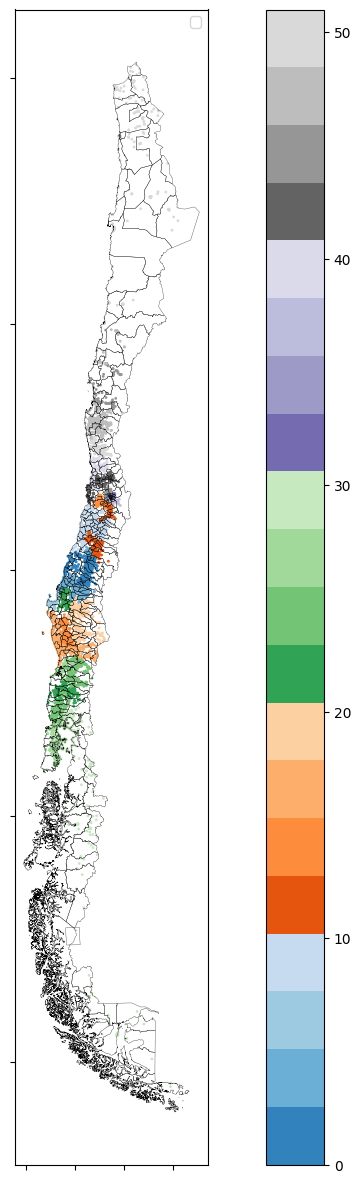

In [19]:
show_schools_and_comunas(comunas_proyected, colegios_gpd[colegios_gpd[columna]<7*10**6], columna, name_graph='Colegios puntuales')

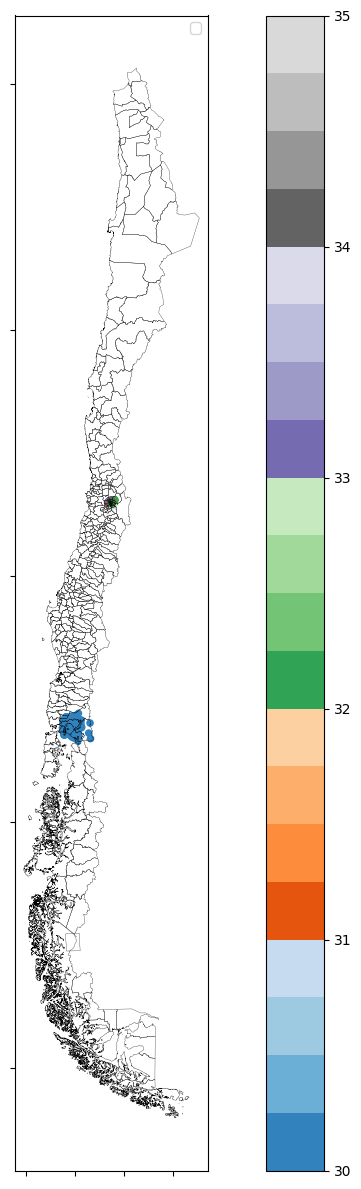

In [168]:
i=30
fig,ax=plt.subplots(1,1,figsize=(15,15))
colegios_gpd[(colegios_gpd['UT']<=i+5) & (i<=colegios_gpd['UT'])].plot(ax=ax, column='UT', cmap='tab20c', legend=True, markersize=20)


comunas_proyected.boundary.plot(ax=ax,color='k',lw=0.2)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.legend([]);

In [33]:
import matplotlib.colors as colors

def truncate_colormap(cmap, minval=0.0, maxval=1.0, n=100):
    new_cmap = colors.LinearSegmentedColormap.from_list(
        'trunc({n},{a:.2f},{b:.2f})'.format(n=cmap.name, a=minval, b=maxval),
        cmap(np.linspace(minval, maxval, n)))
    return new_cmap

cmap = plt.get_cmap()
new_cmap = truncate_colormap(cmap, 0.2, 0.6)

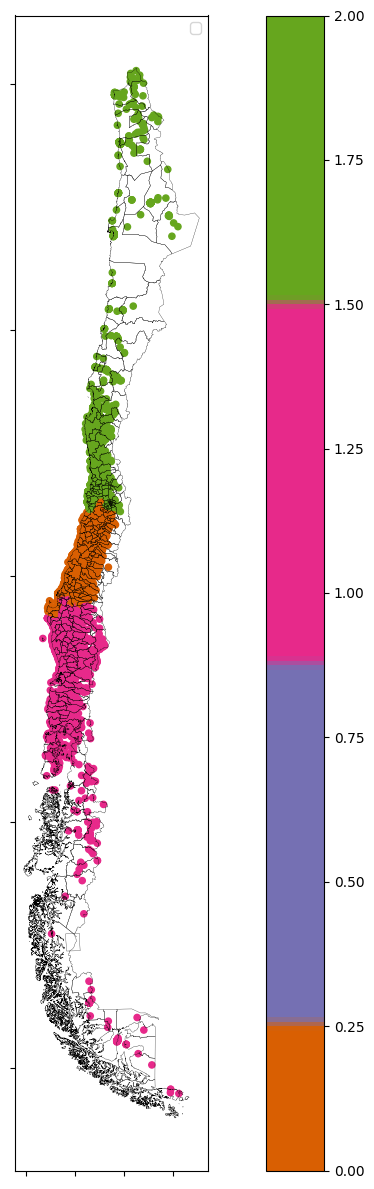

In [43]:
fig,ax=plt.subplots(1,1,figsize=(15,15))
colegios_gpd.plot(ax=ax, column='UT', cmap=new_cmap, legend=True, markersize=20)


comunas_proyected.boundary.plot(ax=ax,color='k',lw=0.2)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.legend([]);

In [69]:
import matplotlib.colors as mcolors

colors1 = plt.cm.Dark2(np.linspace(0,1))
colors2 = plt.cm.tab10(np.linspace(0,1))
colors3 = plt.cm.Set1(np.linspace(0,1))



colors = np.vstack((colors1, colors2, colors3, colors1, colors2, colors3))
mymap = mcolors.LinearSegmentedColormap.from_list('my_colormap', colors)

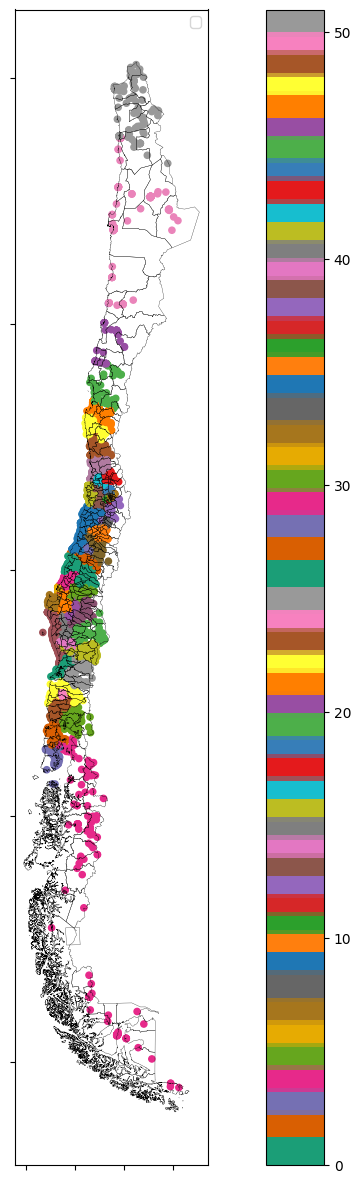

In [70]:
fig,ax=plt.subplots(1,1,figsize=(15,15))
colegios_gpd.plot(ax=ax, column='UT', cmap=mymap, legend=True, markersize=20)


comunas_proyected.boundary.plot(ax=ax,color='k',lw=0.2)
ax.set_yticklabels([])
ax.set_xticklabels([])
ax.legend([]);